In [1]:
myfile=r'C:\Users\chandrakanth.seela\Downloads\yashwanth downloads\Data\winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [2]:
wine.shape

(4898, 12)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Variable selection in clustering depends on the business perspective. Let's assume here that sulphates and alcohol are the major variables that impact the quality of wine

In [4]:
wine=wine[["sulphates","alcohol"]]

In [5]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [6]:
wine.describe()

,sulphates,alcohol
count,4898.000000,4898.000000
mean,0.489847,10.514267
std,0.114126,1.230621
min,0.220000,8.000000
25%,0.410000,9.500000
50%,0.470000,10.400000
75%,0.550000,11.400000
max,1.080000,14.200000


In [7]:
scale(wine)

array([[-3.49184257e-01, -1.39315246e+00],
       [ 1.34184656e-03, -8.24275678e-01],
       [-4.36815783e-01, -3.36667007e-01],
       ...,
       [-2.61552731e-01, -9.05543789e-01],
       [-9.62604939e-01,  1.85757201e+00],
       [-1.48839409e+00,  1.04489089e+00]])

In [8]:
#standardizing the data so that the scale of one varaible doesn't impact the other.
wine_std=pd.DataFrame(scale(wine),
                      columns=list(wine.columns))

In [9]:
wine_std.head()

,sulphates,alcohol
0,-0.349184,-1.393152
1,0.001342,-0.824276
2,-0.436816,-0.336667
3,-0.787342,-0.499203
4,-0.787342,-0.499203


In [10]:
wine_std.describe()

,sulphates,alcohol
count,4.898000e+03,4.898000e+03
mean,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00
min,-2.364709e+00,-2.043297e+00
25%,-6.997104e-01,-8.242757e-01
50%,-1.739212e-01,-9.286267e-02
75%,5.271310e-01,7.198184e-01
max,5.171602e+00,2.995326e+00


In [11]:
#we'll try different clusters and select the one which has highest silhouette score
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [12]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.3738832921930516
3 0.41124644436281227
4 0.3818023206151632
5 0.33521926867324314
6 0.34750167866082093
7 0.35319450159561344
8 0.35448711225643564
9 0.3513428951645138


we see that for 3 clusters the silhouette score is maximum.Hence we fit the data for 3 clusters

In [13]:
#fitting the data to 3 clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [14]:
labels = kmeans.labels_

In [15]:
labels

array([0, 0, 0, ..., 0, 2, 2])

In [16]:

wine["cluster"]=labels

In [17]:
wine['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4893    2
4894    0
4895    0
4896    2
4897    2
Name: cluster, Length: 4898, dtype: int32

In [18]:
wine['cluster'].value_counts()

0    2275
2    1482
1    1141
Name: cluster, dtype: int64

In [19]:
wine.groupby(['cluster']).mean()

,sulphates,alcohol
cluster,,
0,0.457833,9.554952
1,0.646582,10.748785
2,0.418320,11.806343


In [20]:
import seaborn as sns

In [21]:
%matplotlib inline

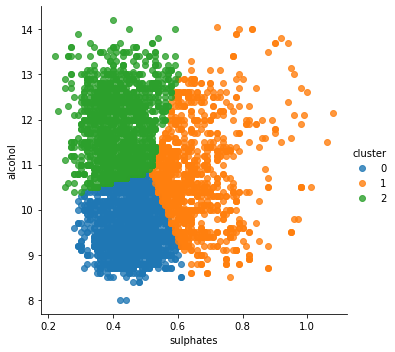

In [22]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

# Agglomerative Clustering

Implementing clustering using Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
for n_clusters in range(2,10): #trying clusters from 2 to 10
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.3091095689547383
For n_clusters = 3 The average silhouette_score is: 0.36507065689263013
For n_clusters = 4 The average silhouette_score is: 0.36394118955693916
For n_clusters = 5 The average silhouette_score is: 0.2849369402765109
For n_clusters = 6 The average silhouette_score is: 0.28173689619112985
For n_clusters = 7 The average silhouette_score is: 0.30584775050004287
For n_clusters = 8 The average silhouette_score is: 0.29918403546397854
For n_clusters = 9 The average silhouette_score is: 0.2931385252344828


we see that For n_clusters = 3 The average silhouette_score is highest

In [25]:
n=3 #cluster with highest silhouette score
hclus=AgglomerativeClustering(n_clusters=n, affinity='euclidean',linkage='ward')

In [26]:
hclus

AgglomerativeClustering(n_clusters=3)

In [27]:
labels_hclus=hclus.fit_predict(wine_std)

In [28]:
wine['cluster_hclus']=labels_hclus

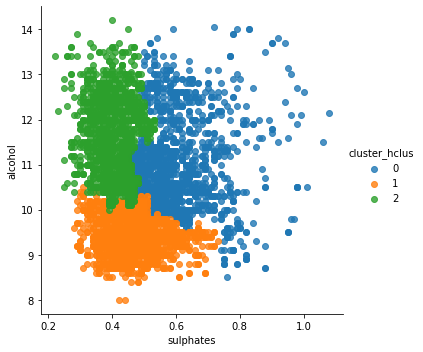

In [29]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

# DBSCAN

In [30]:
mydata=pd.read_csv(r"C:\Users\chandrakanth.seela\Downloads\yashwanth downloads\Data\moon_data.csv")

In [31]:
mydata.head()

,Unnamed: 0,X,Y
0,0,1.045255,0.332214
1,1,0.801944,-0.411547
2,2,-0.749356,0.775108
3,3,0.975674,0.191768
4,4,-0.512188,0.929997


In [32]:
mydata=pd.read_csv(r"C:\Users\chandrakanth.seela\Downloads\yashwanth downloads\Data\moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


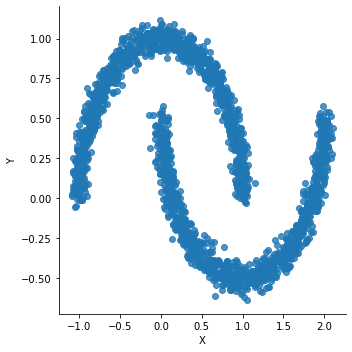

In [33]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

In [34]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

In [35]:
mydata.head()

,X,Y,cluster
0,1.045255,0.332214,1
1,0.801944,-0.411547,1
2,-0.749356,0.775108,0
3,0.975674,0.191768,1
4,-0.512188,0.929997,0


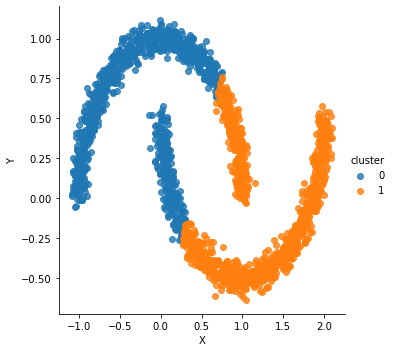

In [36]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

Although we could see two clusters clearly, k-means is not able to distinguish the two clusters clearly

In [37]:
del mydata['cluster']

In [38]:
from sklearn.cluster import DBSCAN

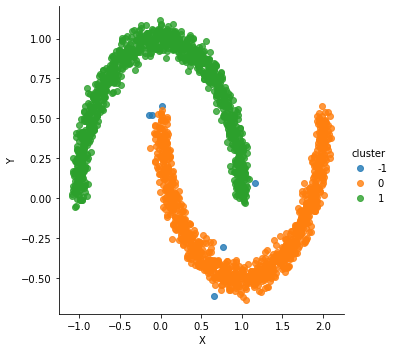

In [39]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


In [40]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

In [41]:
del mydata['cluster']

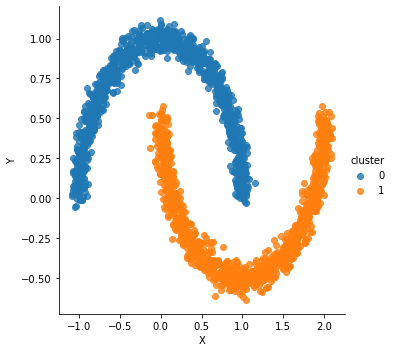

In [42]:
db1 = DBSCAN(eps=0.3, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db1.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [43]:
pd.Series(db1.labels_).value_counts()

1    1000
0    1000
dtype: int64

In [44]:
del mydata['cluster']

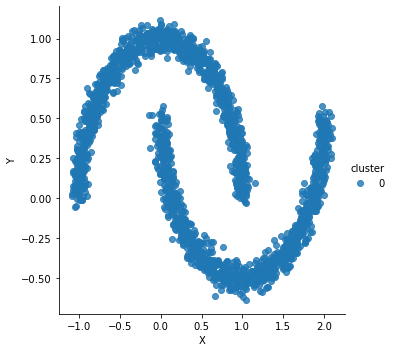

In [45]:
db2 = DBSCAN(eps=0.5, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db2.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

As we increase the epsilon value the no.of clusters decreases.In the above implementation we can observe that for epsilon value 0.5 we got only one cluster. Also if we decrease the epsilon value we get more number of clusters.

In [46]:
del mydata['cluster']

In [47]:
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


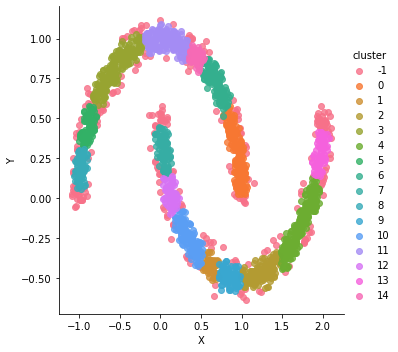

In [48]:
db3 = DBSCAN(eps=0.07, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db3.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [49]:
pd.Series(db3.labels_).value_counts()

-1     260
 3     206
 4     203
 11    170
 0     166
 2     143
 10    131
 6     130
 7      92
 9      86
 13     82
 5      81
 12     70
 8      69
 1      59
 14     52
dtype: int64

# anamoly detection with dbscan

In [50]:
myfile=r'C:\Users\chandrakanth.seela\Downloads\yashwanth downloads\Data\Wholesale customers data.csv'

groc=pd.read_csv(myfile)

In [51]:
groc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [52]:
groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

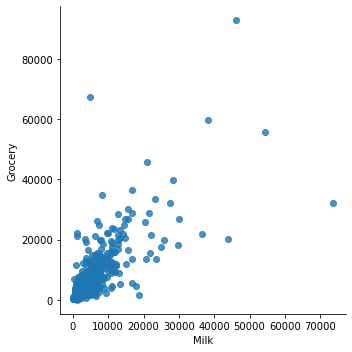

In [53]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [54]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.5918367346938775 , percentage of outliers is:  7.95
For epsilon = 0.6836734693877551 , percentage of outliers is:  6.36
For epsilon = 0.7755102040816326 , percentage of outliers is:  5.68
For epsilon = 0.8673469387755102 , percentage of outliers is:  4.55
For epsilon = 0.9591836734693877 , percentage of outliers is:  4.32
For epsilon = 1.0510204081632653 , percentage of outliers is:  3.41
For epsilon = 1.1428571428571428 , percentage of outliers is:  3.41
For epsilon = 1.2346938775510203 , percentage of outliers is:  2.05
For epsilon = 1.3265306122448979 , percentage of outliers is:  2.05
For epsilon = 1.4183673469387754 , percentage of outliers is:  2.05
For epsilon = 1.5102040816326532 , percentage of outliers is:  1.82
For epsilon = 1.6020408163265307 , percentage of outliers is:  1.82
For epsilon = 1.6938775510204083 , percentage of outliers is:  1.36
For epsilon = 1.7857142857142858 , percentage of outliers is:  

In [55]:
#selecting epsilon value which gives only 5 percentage of outliers
db = DBSCAN(eps=0.77, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

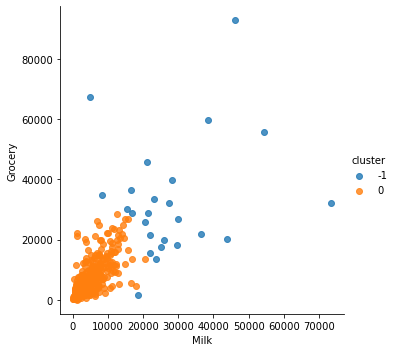

In [56]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')